MNIST
Aproximate error rate BEFORE training is 90.7 %
Aproximate error rate during iteration 0 is 80.8 %
Aproximate error rate during iteration 100 is 6.6 %
Aproximate error rate during iteration 200 is 4.6 %
Aproximate error rate during iteration 300 is 3.4 %
Aproximate error rate during iteration 400 is 3.4 %
Aproximate error rate during iteration 500 is 2.6 %
Aproximate error rate during iteration 600 is 3.7 %
Aproximate error rate during iteration 700 is 2.6 %
Aproximate error rate during iteration 800 is 2.2 %
Aproximate error rate during iteration 900 is 3.3 %

Total training time: 90.77 seconds

Final aproximate training error is 2.4 %

Final test error is 2.79 %

In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [80]:
Activations1 = np.load("tmp/ActivationsMnist_Layer1.npy")
Activations2 = np.load("tmp/ActivationsMnist_Layer2.npy")

Weight1 = np.load("tmp/WeightMnist_1.npy")
Weight2 = np.load("tmp/WeightMnist_2.npy")


print(Activations1.shape)
print(Activations2.shape)

print(Weight1.shape)
print(Weight2.shape)

(32, 8, 28, 28, 1)
(64, 8, 28, 28, 1)
(5, 5, 1, 32)
(5, 5, 32, 64)


# Best Nodes

In [81]:
Norm1 = np.linalg.norm(Activations1, axis = (3, 4))
Norm1 = np.linalg.norm(Norm1, axis = (1, 2))

In [82]:
print("Activations by Node:")
print(Norm1)

Activations by Node:
[ 1.80315217  3.70951262  1.75265033  1.8973003   4.27167714  0.97383546
  0.38489399  1.46793139  1.99028462  1.07417406  1.56461169  1.74473481
  2.96459919  1.98047797  1.92087787  0.57278131  3.01870555  3.07655063
  1.80552576  1.70999321  1.30415779  1.46705395  2.8292929   1.24786595
  1.53598218  1.2033296   2.6646019   5.2405677   0.9761006   3.45662096
  1.08625756  0.87601391]


In [83]:
print(np.argsort(Norm1))

[ 6 15 31  5 28  9 30 25 23 20 21  7 24 10 19 11  2  0 18  3 14 13  8 26 22
 12 16 17 29  1  4 27]


In [84]:
best_nodes = np.where(24 <= np.argsort(Norm1))[0]

In [85]:
print("Best Nodes by Activation:", best_nodes)

Best Nodes by Activation: [ 2  4  6  7 12 23 28 31]


D:\Anaconda64\envs\AdvML\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


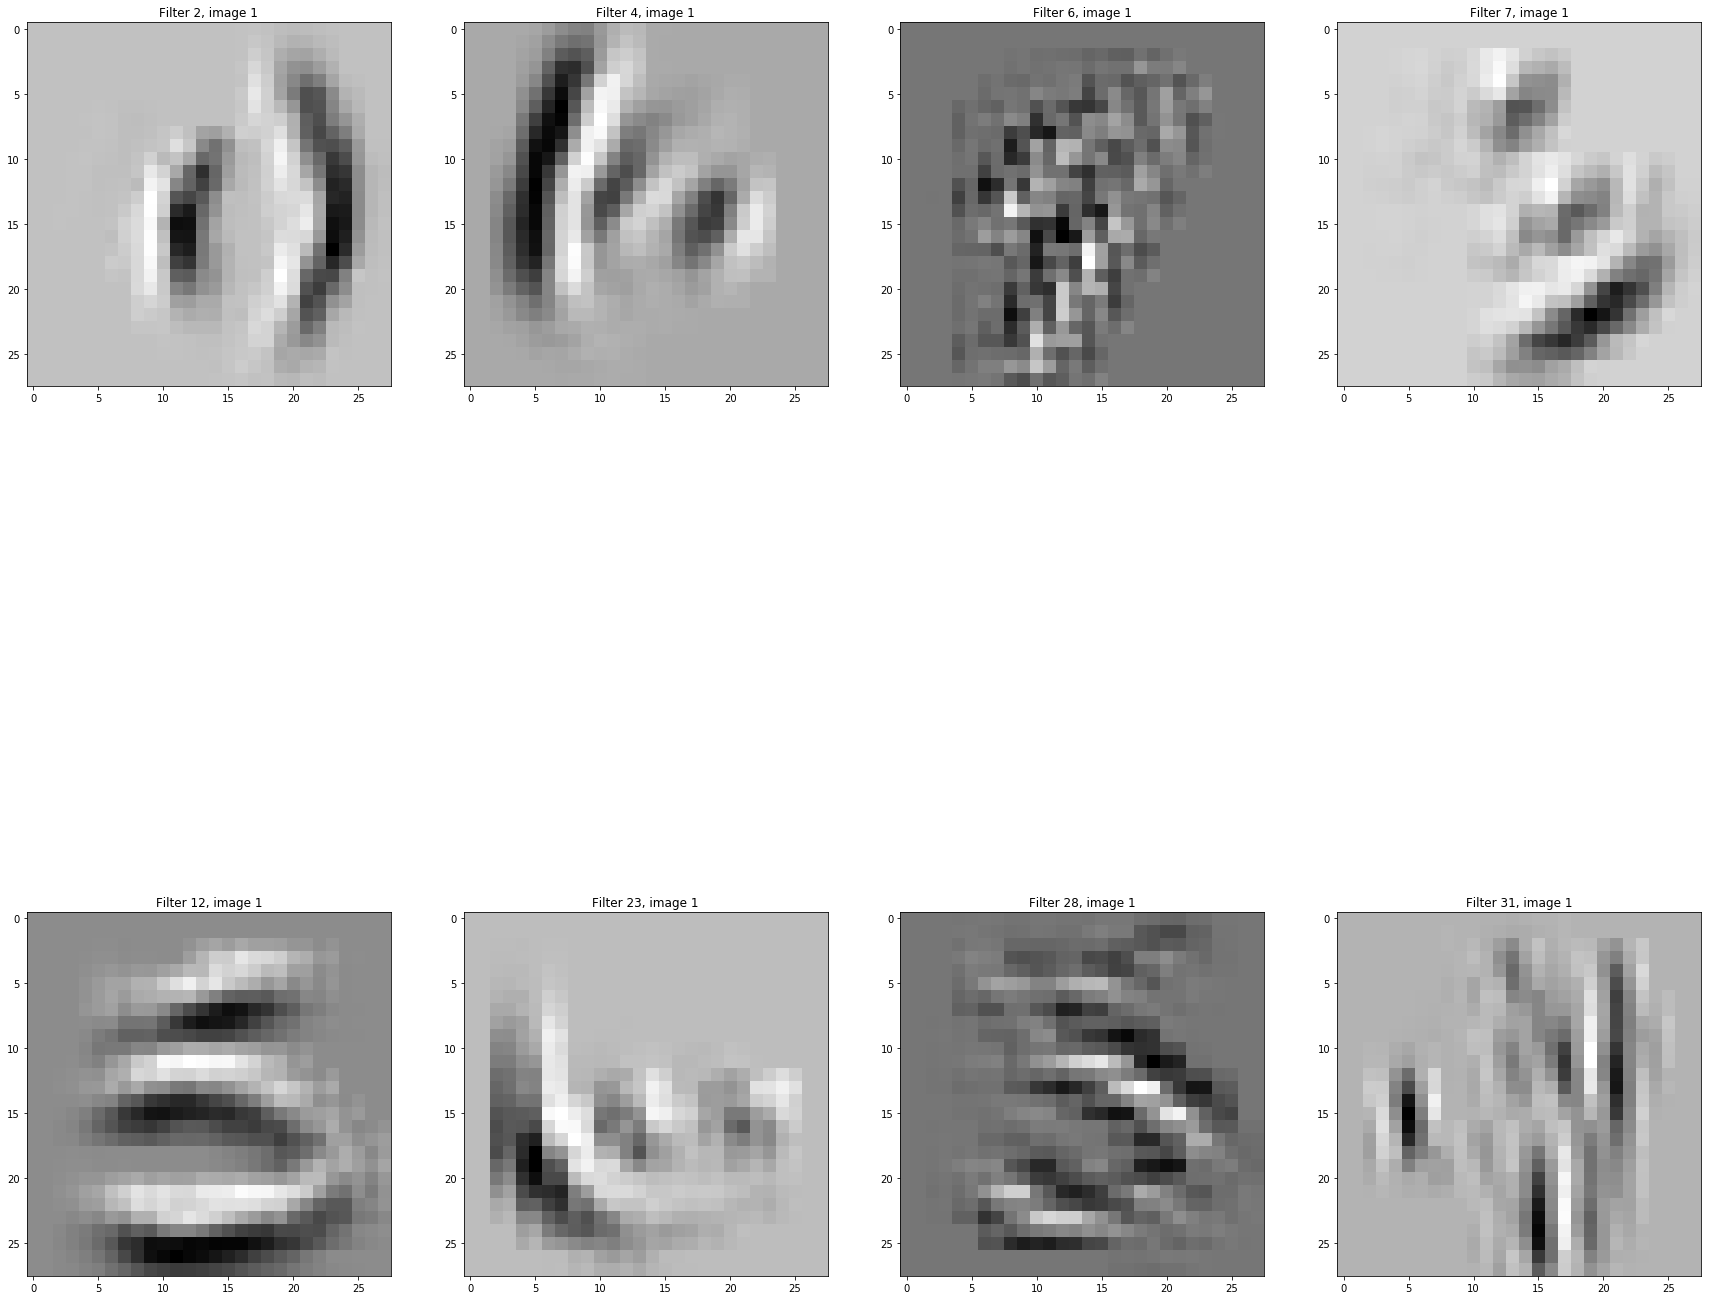

In [86]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in best_nodes:
    plt.subplot(2, 4, j)
    plt.title('Filter ' + str(i) + ', image 1')
    plt.imshow(Activations1[i, 1, :, :, 0], interpolation="nearest", cmap="gray")
    j = j + 1
    
plt.show()

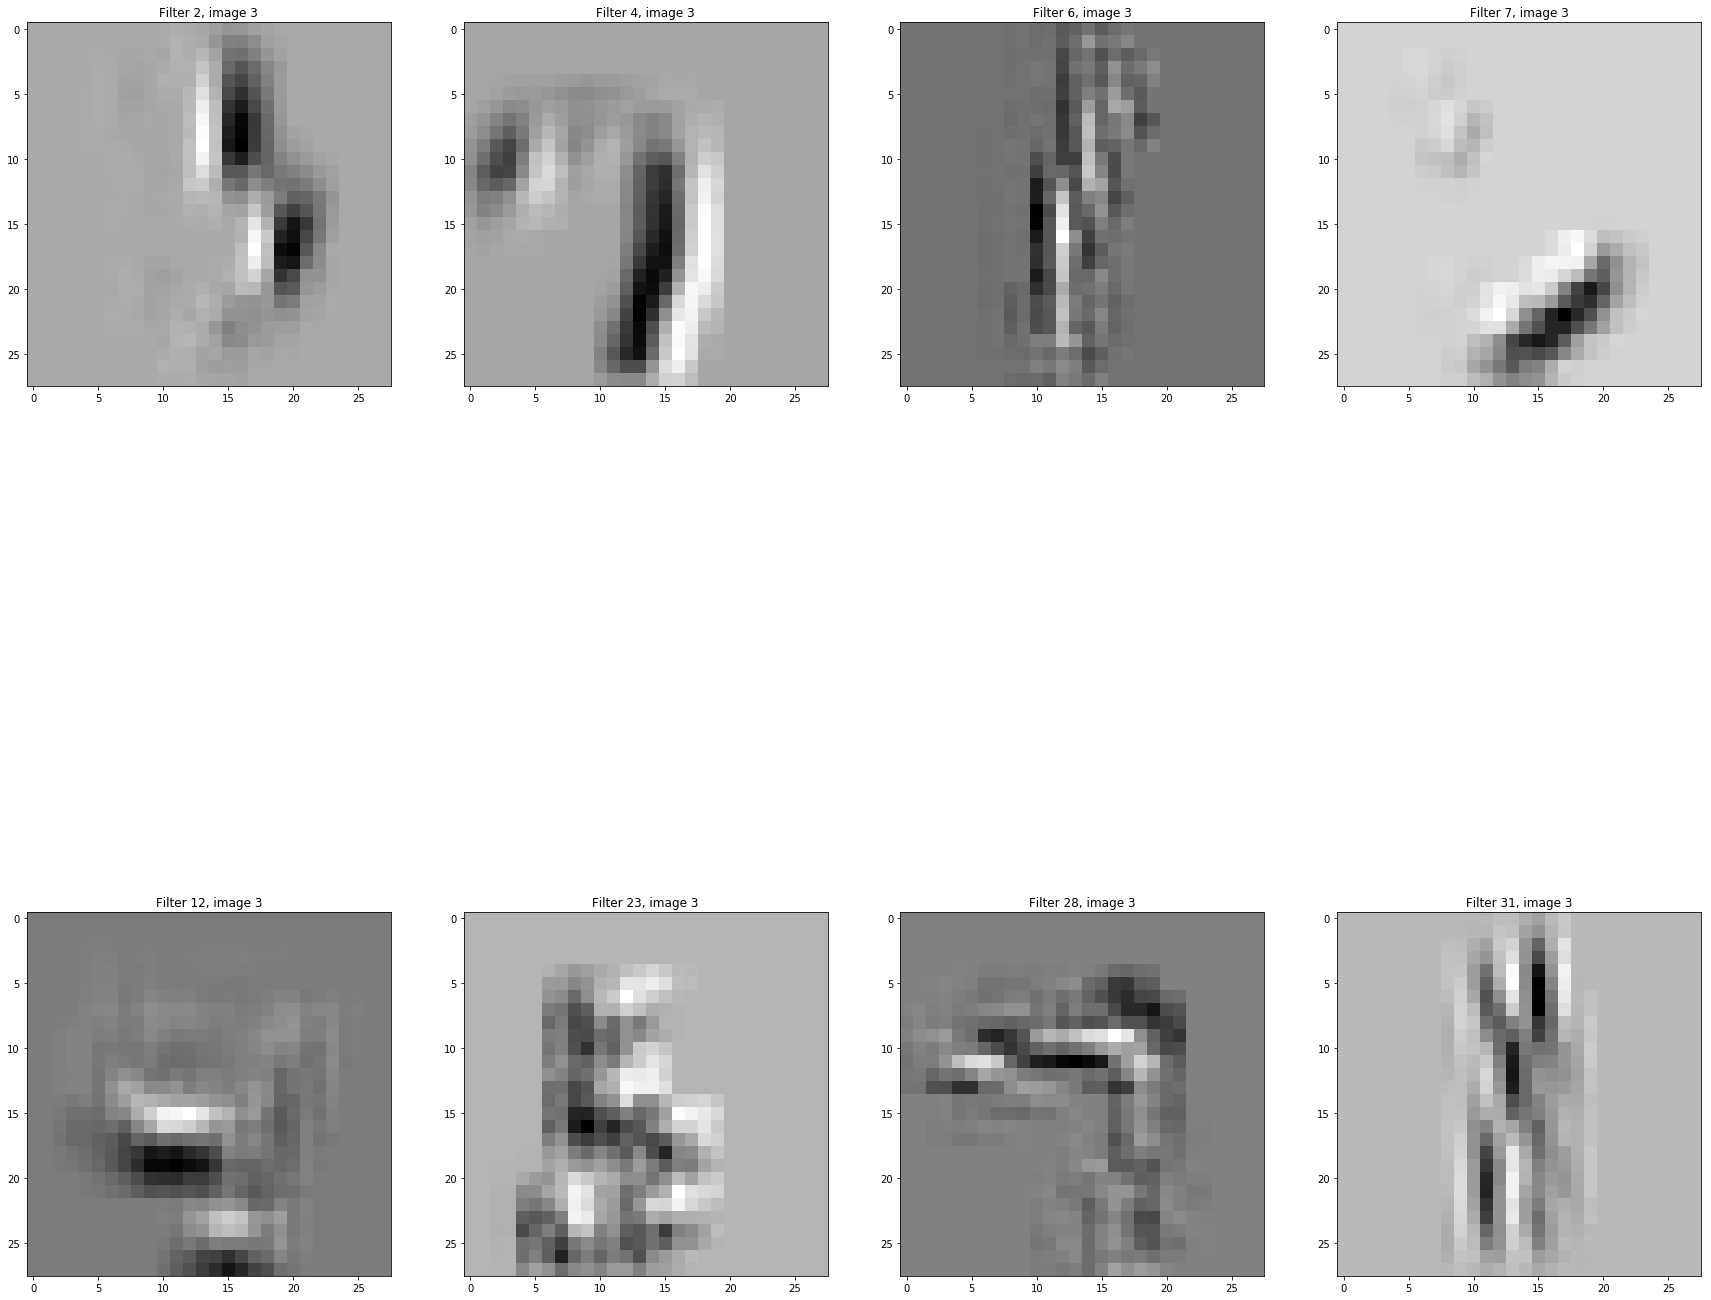

In [87]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in best_nodes:
    plt.subplot(2, 4, j)
    plt.title('Filter ' + str(i) + ', image 3')
    plt.imshow(Activations1[i, 3, :, :, 0], interpolation="nearest", cmap="gray")
    j = j + 1
    
plt.show()

# Image action by random node:

In [88]:
subset = random.sample(range(Activations1.shape[1]), 2)
print("Selected nodes:", subset)

Pictures_Activations1 = Activations1[subset,]
print("Shape:", Pictures_Activations1.shape)

Selected nodes: [4, 2]
Shape: (2, 8, 28, 28, 1)


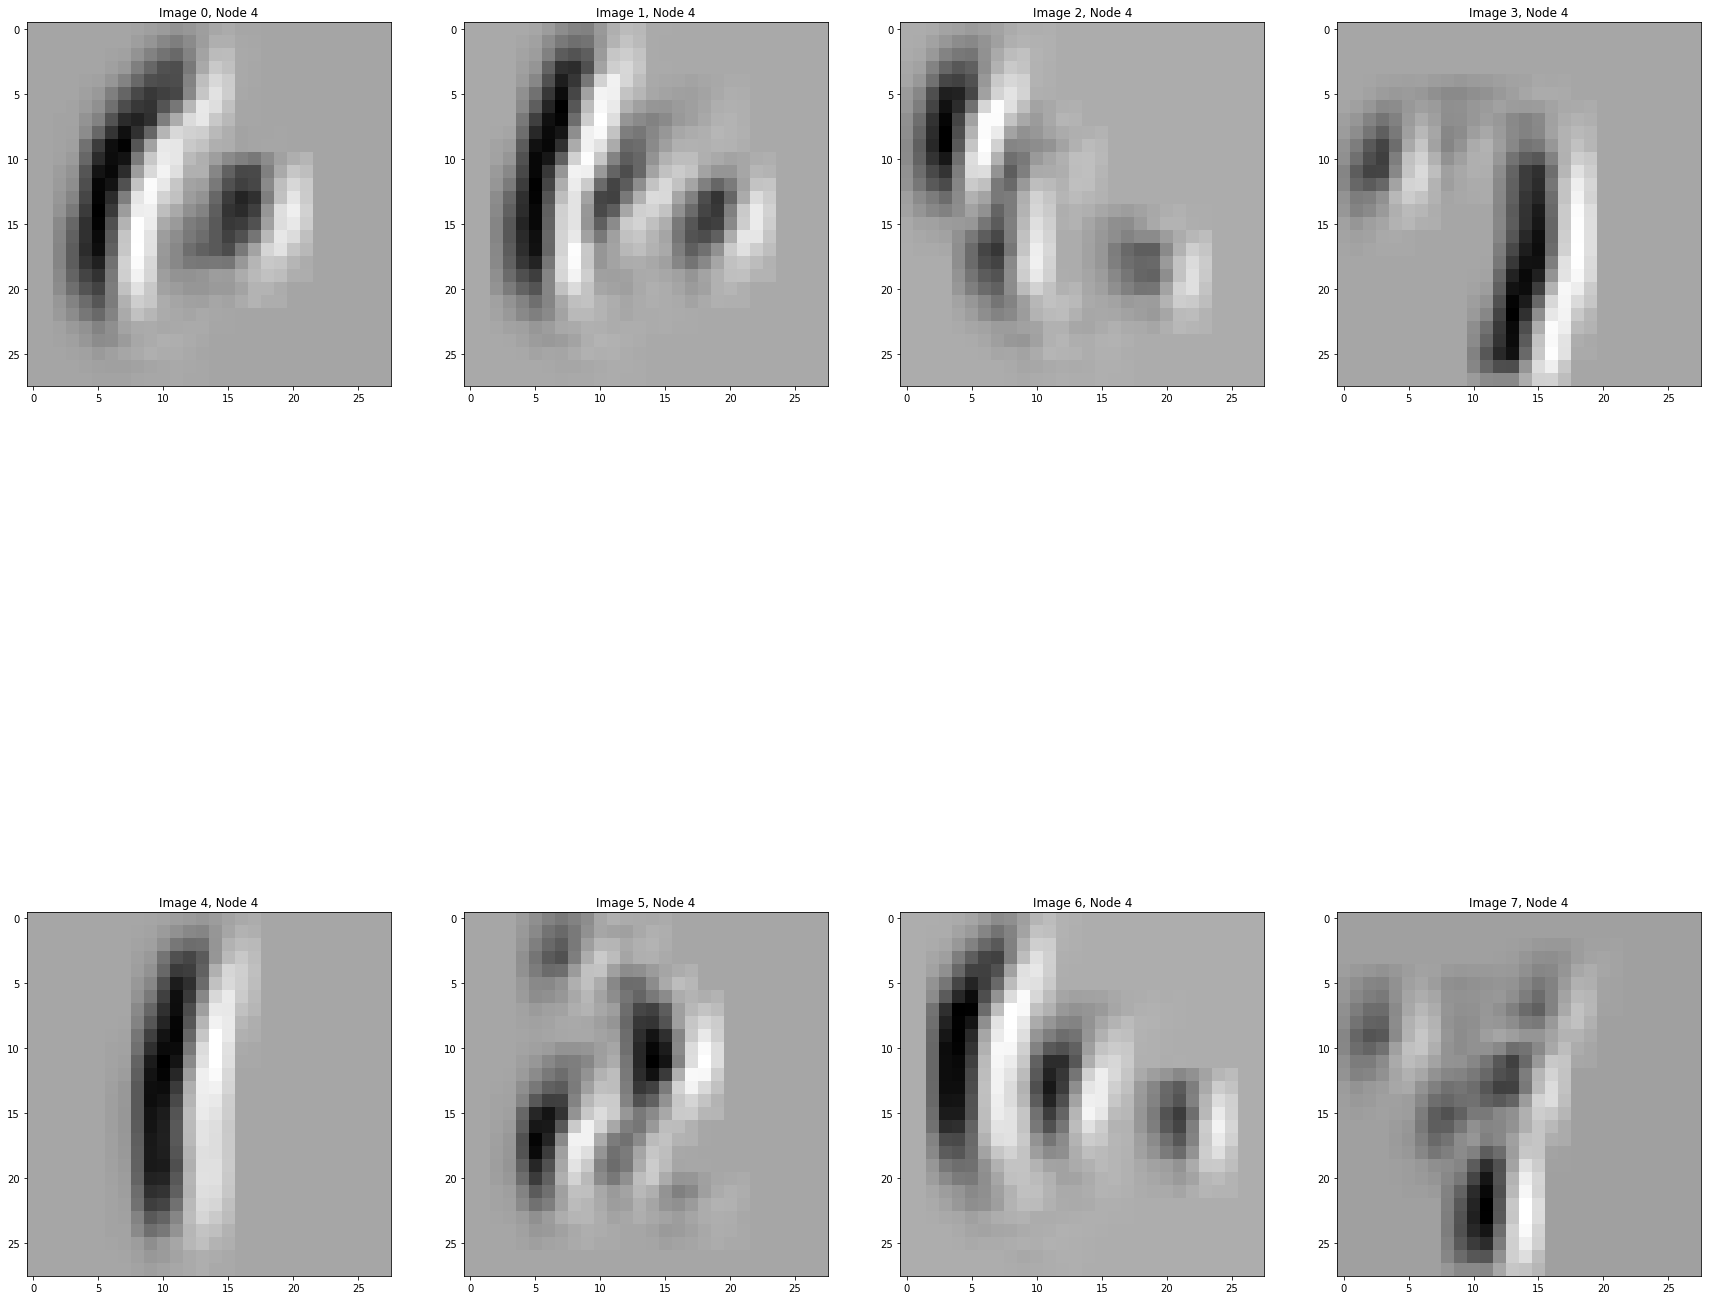

In [89]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(8):
    plt.subplot(2, 4, j)
    plt.title('Image ' + str(i) + ", Node " + str(subset[0]))
    plt.imshow(Activations1[subset[0], i, :, :, 0], interpolation="nearest", cmap="gray")
    j = j + 1
    
plt.show()

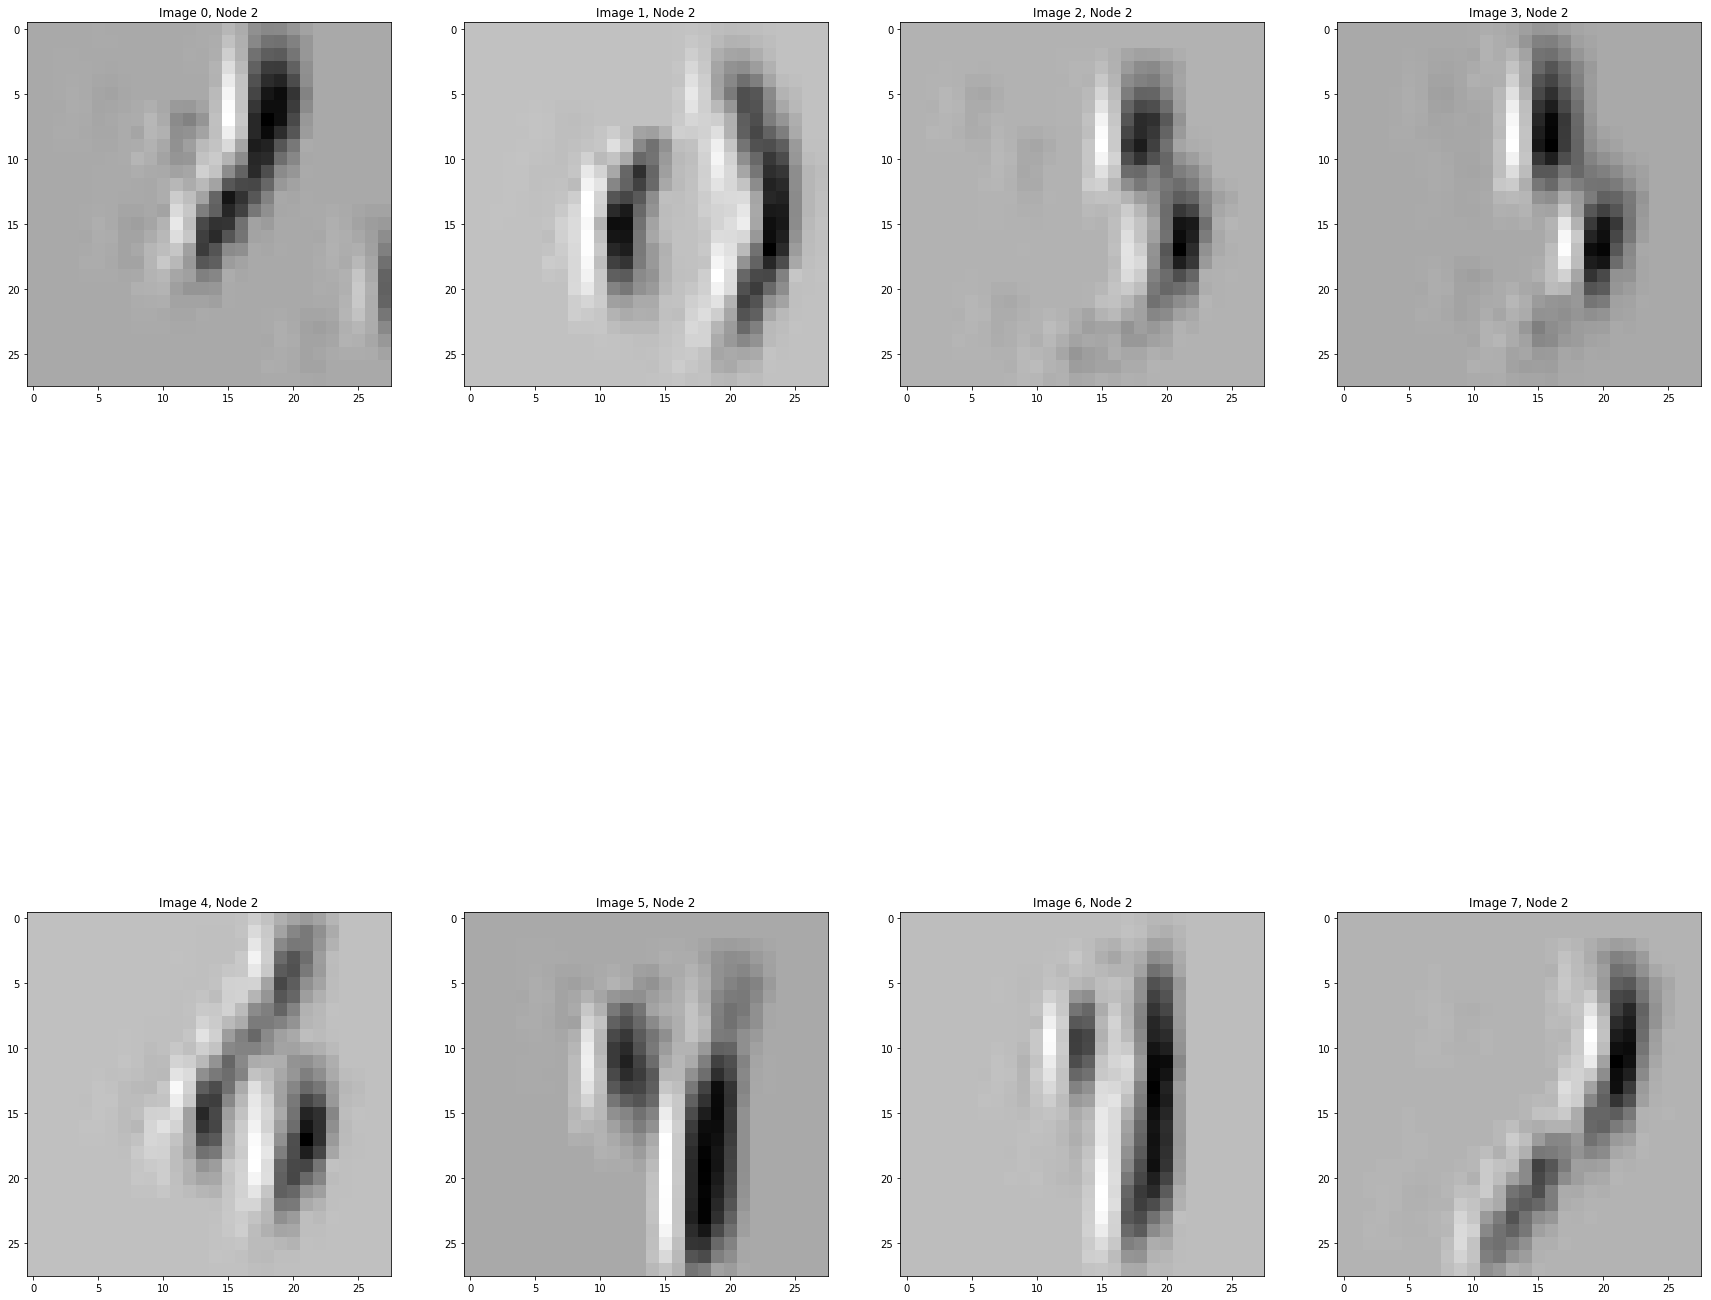

In [90]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(8):
    plt.subplot(2, 4, j)
    plt.title('Image ' + str(i) + ", Node " + str(subset[1]))
    plt.imshow(Activations1[subset[1], i, :, :, 0], interpolation="nearest", cmap="gray")
    j = j + 1
    
plt.show()

# Looking at Weights

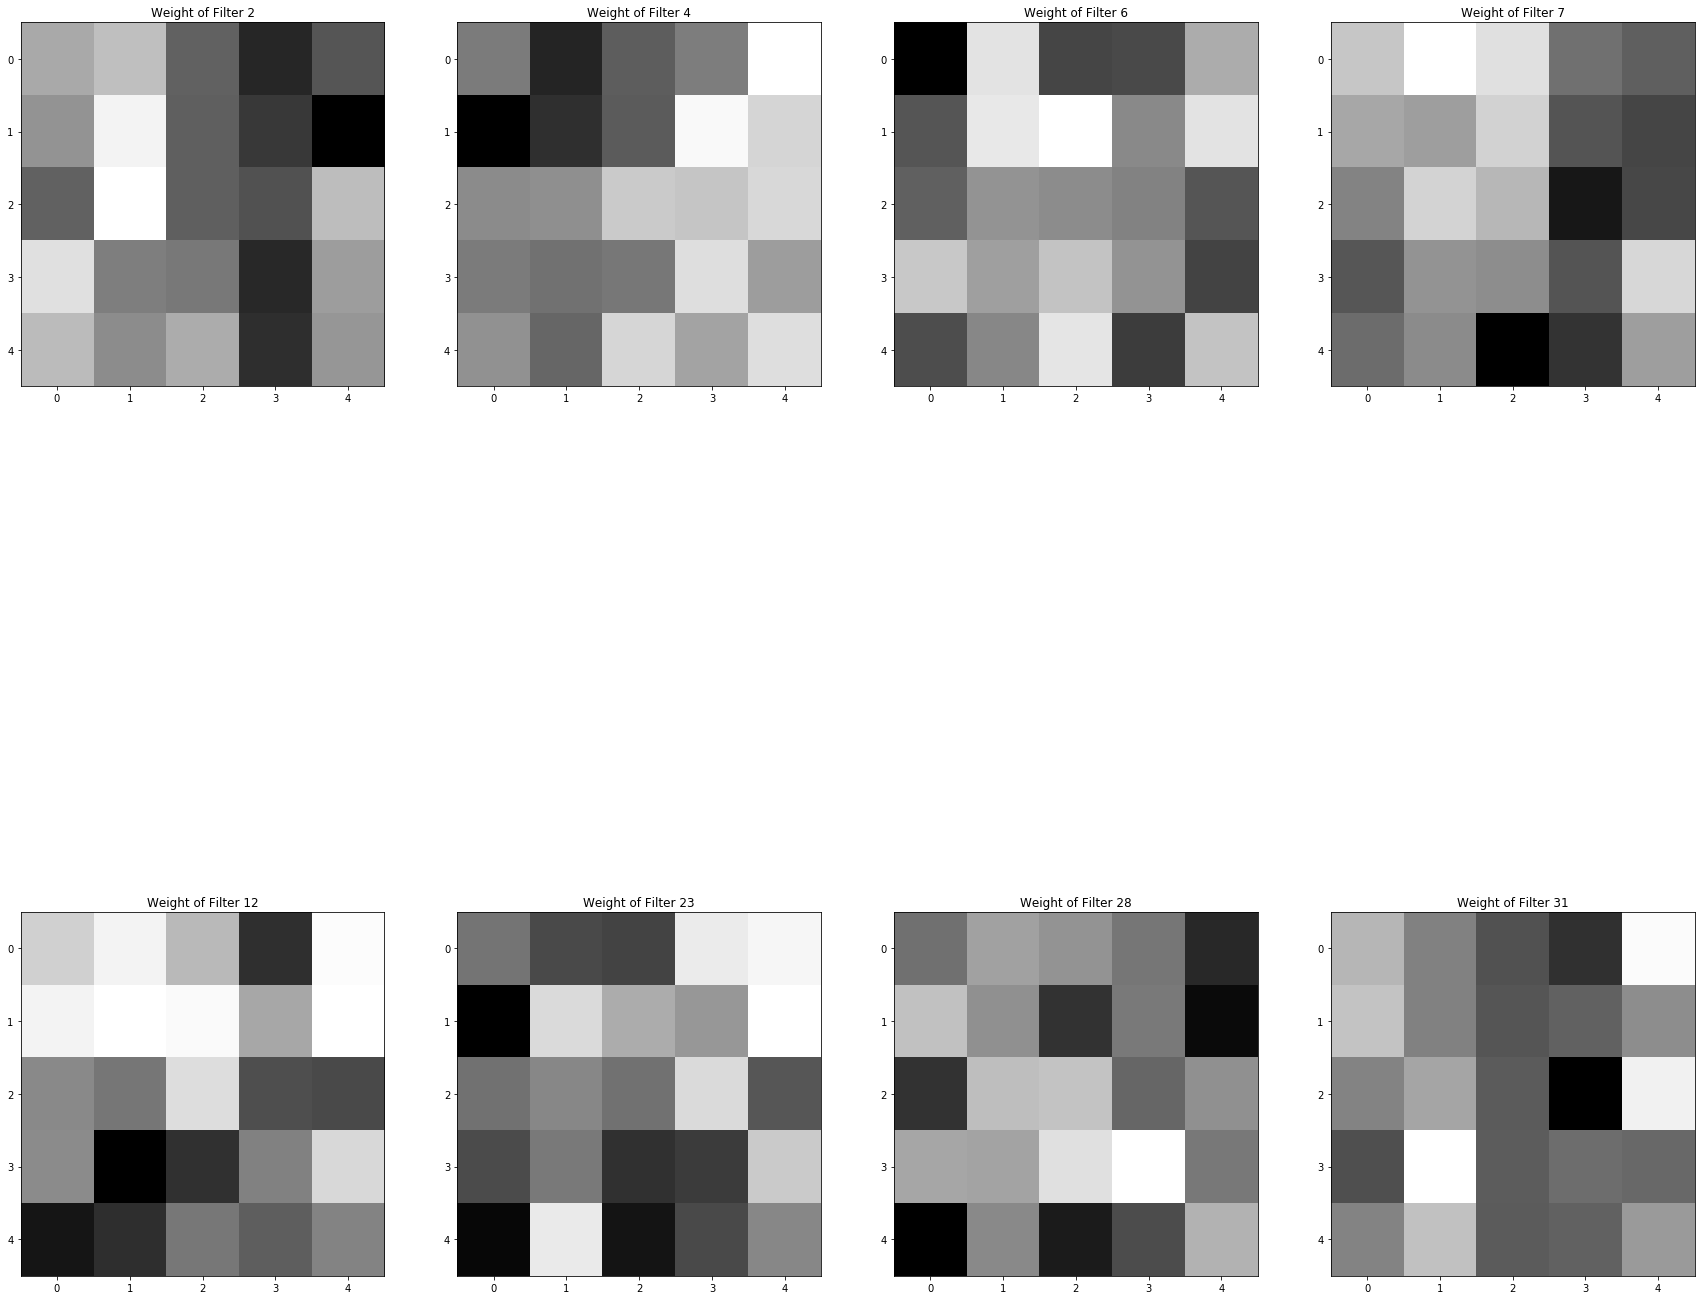

In [93]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in best_nodes:
    plt.subplot(2, 4, j)
    plt.title('Weight of Filter ' + str(i))
    plt.imshow(Weight1[:, :, 0, i], interpolation="nearest", cmap="gray")
    j = j + 1
    
plt.show()